# Data Visualization Notebook

Used to generate the plots for our poster and report, as well as for our own understanding of the data.

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [53]:
def compare_results(a, b, label_a = "a", label_b = "b", sort = True):
    assert len(a) == len(b)
    
    ax = plt.gca()
    
#     plt.figure(figsize=(14, 6))
    
    a = [-q for q in a]
    b = [-q for q in b]
    
    if sort:
        a = list(sorted(a, reverse=True))
        b = list(sorted(b, reverse=True))
    
    xs = list(range(1, len(a) + 1))
    
    ax.set_ylim(bottom = 0, top = int(1.4 * max(*a,*b)))
    
    if sort:
        plt.bar(xs, a, alpha=0.5, color="red", width = 1.0, label=label_a)
        plt.bar(xs, b, alpha=0.5, color="blue", width = 1.0, label=label_b)
        plt.xlabel("Test Set Index, Sorted Worst to Best")
    else:
        
        better_a = round(100 * sum(np.array(a) < b) / len(a), 1)
        better_b = round(100 * sum(np.array(b) < a) / len(b), 1)
        
        plt.bar(xs, a, alpha=0.5, color="red", width = 1.0, label=f"{label_a} (Outperforms in {better_a}% of Cases)")
        plt.bar(xs, b, alpha=0.5, color="blue", width = 1.0, label=f"{label_b} (Outperforms in {better_b}% of Cases)")
        plt.xlabel("Test Set Index")
    
    
    plt.title(f"Pivots Required on Test Set for {label_a} vs {label_b}")
    plt.ylabel("Number of Pivots")
    plt.legend(loc="upper right")
    plt.show()

In [3]:
def delta_qq(ref, comps, name_ref, name_comps):
    
    colours = ["red", "blue", "green", "purple", "black", "yellow", "orange"]
    
    for c, cname, col in zip(comps, name_comps, colours):
        diffs = c - ref
        n = len(diffs)
        quantiles = np.array(range(n)) / (n-1)
        plt.scatter(quantiles, np.sort(diffs), label=cname, color = col, alpha=0.5, s=5)
    
    
    plt.title(f"Pivots Saved Relative to {name_ref}")
    plt.xlabel("Quantile")
    plt.ylabel("Pivots Saved")
    plt.legend(loc="upper left")


In [41]:
def delta_qq2(ref, comps, name_ref, name_comps, vertical=False):
    
    if vertical:
        sizes = (len(comps),)
    else:
        sizes = (1, len(comps))
    
    fig, axs = plt.subplots(*sizes)
    
    if vertical:
        fig.set(figheight=14)
        fig.tight_layout(pad=4)
    else:
        fig.set(figwidth=14)
        
    
    for i, (c, cname) in enumerate(zip(comps, name_comps)):
        diffs = c - ref
        n = len(diffs)
        quantiles = np.array(range(n)) / (n-1)
        axs[i].plot(quantiles, np.sort(diffs), color = "blue")
        axs[i].set_title(f"{name_ref} vs {cname} (Mean = {round(np.mean(diffs), 1)})")
        axs[i].set(xlabel ="Test Set Quantile", ylabel = "Pivots Saved")


In [5]:
def load(fname):
    with open(fname, "r") as file:
        return json.load(file)

def nload(fname):
    return np.array(load(fname))
    
def save(fname, obj):
    with open(fname, "w") as file:
        json.dump(obj, file)

In [6]:
def dict_to_list(in_name, out_name):
    loaded = load(in_name)
    n = len(loaded)
    aslist = []
    for i in range(n):
        aslist.append(loaded[str(i)])
    
    save(out_name, aslist)

In [7]:
dict_to_list("../outputs/euc4.json", "../outputs/euc4_s.json")

In [8]:
dict_to_list("../outputs/ds_clone.json", "../outputs/ds_clone_s.json")

In [9]:
dict_to_list("../outputs/heuristic.json", "../outputs/heuristic_s.json")

In [10]:
dict_to_list("../outputs/non_euc4.json", "../outputs/non_euc4_s.json")

In [11]:
dict_to_list("../outputs/obj_only.json", "../outputs/obj_only_s.json")

In [12]:
euc4 = nload("../outputs/euc4_s.json")

In [13]:
ds_clone = nload("../outputs/ds_clone_s.json")

In [14]:
heuristic = nload("../outputs/heuristic_s.json")

In [15]:
non_euc4_s = nload("../outputs/non_euc4_s.json")

In [16]:
obj_only = nload("../outputs/obj_only_s.json")

In [17]:
rand = nload("../inference/4_euclid_random_s.json")

In [18]:
dantz = nload("../inference/4_euclid_dantzig_s.json")

In [19]:
steep = nload("../inference/4_euclid_steepest_edge_s.json")

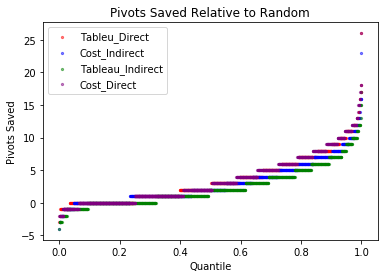

In [145]:
delta_qq(rand, 
         [-euc4, 
          -ds_clone, 
          -heuristic, 
          -obj_only], "Random", 
         ["Tableu_Direct", 
          "Cost_Indirect", 
          "Tableau_Indirect", 
          "Cost_Direct"])

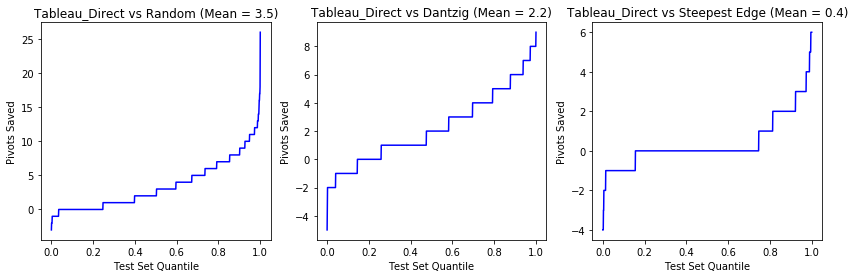

In [43]:
delta_qq2(euc4, [-rand, -dantz, -steep], "Tableau_Direct", ["Random", "Dantzig", "Steepest Edge"], vertical=False)

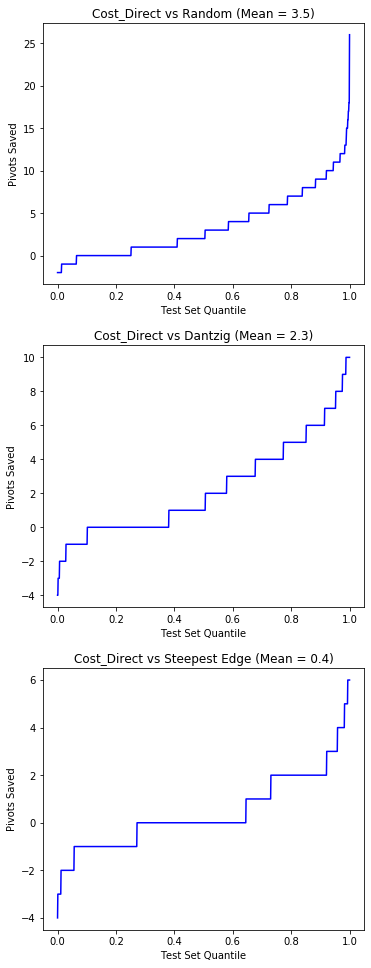

In [44]:
delta_qq2(obj_only, [-rand, -dantz, -steep], "Cost_Direct", ["Random", "Dantzig", "Steepest Edge"], vertical=True)

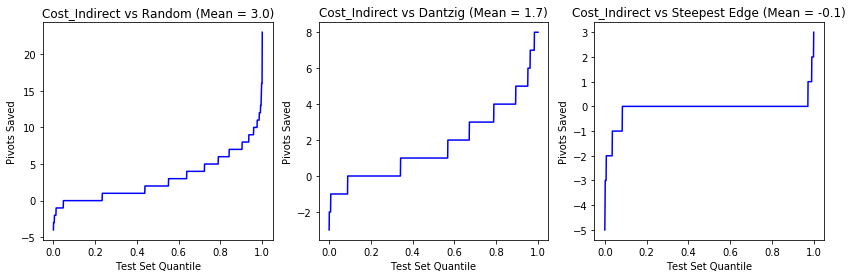

In [30]:
delta_qq2(ds_clone, [-rand, -dantz, -steep], "Cost_Indirect", ["Random", "Dantzig", "Steepest Edge"])

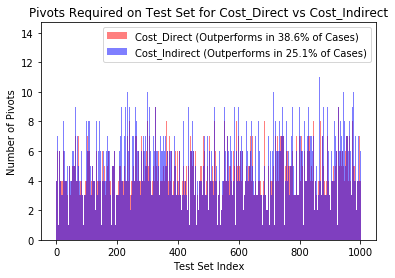

In [45]:
plt.figure(figsize=(6, 4))
compare_results(-obj_only, -ds_clone, label_a = "Cost_Direct", label_b = "Cost_Indirect", sort = False)

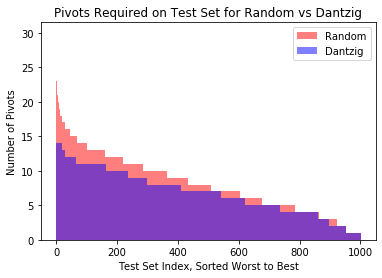

In [97]:
compare_results(rand, dantz, label_a = "Random", label_b = "Dantzig")

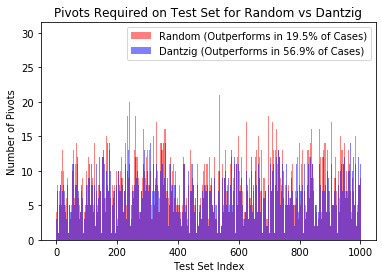

In [98]:
compare_results(rand, dantz, label_a = "Random", label_b = "Dantzig", sort=False)

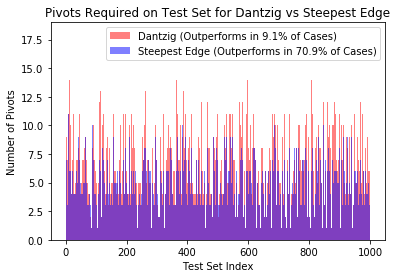

In [54]:
compare_results(dantz, steep, label_a = "Dantzig", label_b = "Steepest Edge", sort = False)

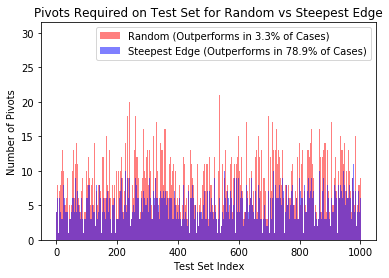

In [100]:
compare_results(rand, steep, label_a = "Random", label_b = "Steepest Edge", sort = False)

In [71]:
randa = np.array(rand)
dantza = np.array(dantz)
steepa = np.array(steep)

In [73]:
sum(randa <= dantza)

782